## CIFAR10 - CNN using FastAI*
*old version of the lib

### Summary
Models were trained using transfer learning from ResNet50.
The baseline model was built with 32x32px image size, 0.01 learning rate and it took 10 epochs. The result was **72% accuracy**. 
Presented approach is based on resizing images during training starting from 8x8, through 16x16, 24x24, to 32x32px. It improved the result up to **84% accuracy**.

It is worth to mention that solutions based on SENet18 presented by FastAI community led to the accuracy close to **94%**.


### Dataset
CIFAR10 is well known dataset for multiple classification and it is very often used as a benchamark. It includes 60 000 PNG images and has 10 categories (6 000 observations per class). It can be downloaded from [here](https://course.fast.ai/datasets.html).

### Computing
Computations were performed on EC2 instance with GPU, which significantly improved time efficiency of the training. It was set up according to the [tutorial](https://github.com/reshamas/fastai_deeplearn_part1/blob/master/tools/aws_ami_gpu_setup.md)

### FastAI library
Current version of the library, relevant courses and blogposts can be found [here](https://www.fast.ai/).

In [1]:
from fastai.imports import *
from fastai.conv_learner import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# check if CUDA is avalable
torch.cuda.is_available()

True

In [3]:
# check if CuDNN component is enabled (significantly improves performance)
torch.backends.cudnn.enabled

True

In [4]:
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

#definiowanie klas
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#parametr okreslajacy rozmiar obrazow
size = 32

Below code has different components:
1. Architecture definition (for transfer learning)
2. ImageClassifierData creates data object for trainging with size 8x8. tfms parameter defines transformations that can be applied to the training set (resizing, cropping, normalization).
3. ConvLearner defines the method with transfer learning
4. In learn.fit training is being performed. The first argument is *learning_rate*, the second is number of *epochs*.
5. lr_find helps to find optimal *learning rate*.
6. TTA allows to compute accuracy considering that augmentations were used during training.

### 8x8

 84%|████████▍ | 656/782 [00:37<00:15,  8.38it/s, loss=8.01]

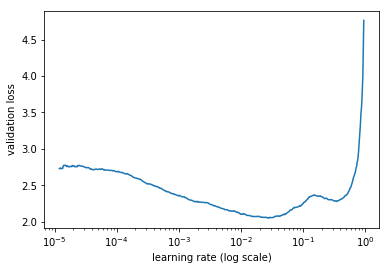

In [5]:
arch = resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 8, aug_tfms=[RandomFlip()], pad=8//8))
learn = ConvLearner.pretrained(arch, data, pretrained=True)
learn.lr_find()
learn.sched.plot()

In [6]:
learn.fit(0.01, 10)

epoch      trn_loss   val_loss   accuracy                    
    0      1.841994   1.717492   0.3679    
    1      1.795099   1.666475   0.3859                      
    2      1.774438   1.670162   0.3843                      
    3      1.725742   1.639829   0.3984                      
    4      1.729046   1.631488   0.406                       
    5      1.729227   1.623257   0.4059                      
    6      1.705554   1.623556   0.4103                      
    7      1.713612   1.617394   0.4095                      
    8      1.720019   1.601696   0.4197                      
    9      1.686129   1.603739   0.4191                      


[1.6037391904830933, 0.4191]

 83%|████████▎ | 652/782 [01:27<00:17,  7.48it/s, loss=7.07]

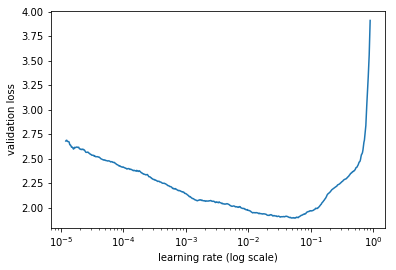

In [7]:
learn.unfreeze()
learn.lr_find()
learn.sched.plot()

In [8]:
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      1.730372   1.644646   0.3839    
    1      1.634889   1.544942   0.434                       
    2      1.604055   1.542832   0.4357                      
    3      1.565939   1.5477     0.4477                      
    4      1.487357   1.444048   0.4834                      


[1.444048459815979, 0.4834]

In [9]:
learn.save('8')
learn.load('8')

### 16x16

 84%|████████▍ | 657/782 [00:39<00:15,  7.98it/s, loss=6.8] 

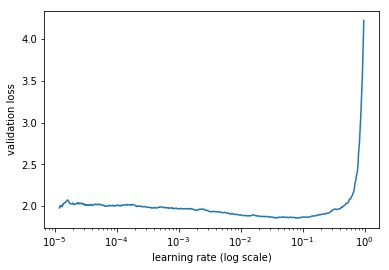

In [10]:
data2 = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 16, aug_tfms=[RandomFlip()], pad=16//8))
learn.set_data(data2)
#learn.unfreeze()
#learn.fit(0.01, 10)
learn.lr_find()
learn.sched.plot()

In [12]:
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      1.820791   1.783541   0.3602    
    1      1.794341   1.757798   0.366                       
    2      1.800951   1.736804   0.3756                      
    3      1.77594    1.73031    0.3792                      
    4      1.75319    1.701736   0.3834                      


[1.7017360969543458, 0.3834]

In [13]:
learn.unfreeze()
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      1.354241   1.237579   0.5542    
    1      1.311523   1.237852   0.5566                      
    2      1.230795   1.178909   0.5959                      
    3      1.233136   1.082288   0.6182                      
    4      1.149498   1.021923   0.641                       


[1.021922839164734, 0.641]

In [14]:
learn.save('16')
learn.load('16')

### 24x24

In [15]:
data3 = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 24, aug_tfms=[RandomFlip()], pad=24//8))
learn.set_data(data3)
#learn.unfreeze()
learn.fit(0.01, 10)

epoch      trn_loss   val_loss   accuracy                    
    0      1.454067   1.416143   0.5173    
    1      1.406484   1.378693   0.5364                      
    2      1.381062   1.388972   0.5345                      
    3      1.386859   1.296837   0.5565                      
    4      1.337136   1.382775   0.5322                      
    5      1.358373   1.246636   0.5681                      
    6      1.326848   1.29688    0.5591                      
    7      1.296289   1.286624   0.5621                      
    8      1.30208    1.374137   0.5422                      
    9      1.288298   1.357387   0.5517                      


[1.3573873046875, 0.5517]

In [16]:
learn.unfreeze()
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      1.197874   3.165255   0.398     
    1      1.07831    0.937348   0.6692                      
    2      1.016561   1.1619     0.6599                      
    3      0.980799   0.890525   0.6883                      
    4      0.970803   1.078035   0.6502                      


[1.0780350120544433, 0.6502]

In [17]:
learn.save('24')
learn.load('24')

### 32x32

In [18]:
data3 = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 32, aug_tfms=[RandomFlip()], pad=32//8))
learn.set_data(data3)
#learn.unfreeze()
learn.fit(0.01, 10)

epoch      trn_loss   val_loss   accuracy                    
    0      1.122614   1.079226   0.6401    
    1      1.103001   1.071682   0.6425                      
    2      1.062014   1.028101   0.6487                      
    3      1.070111   1.027066   0.6484                      
    4      1.068586   1.019891   0.6528                      
    5      1.06376    0.997807   0.6569                      
    6      1.059135   0.992187   0.6545                      
    7      1.085053   1.033822   0.6568                      
    8      1.101753   1.016218   0.655                       
    9      1.084468   0.999332   0.6538                      


[0.9993322507858277, 0.6538]

 82%|████████▏ | 639/782 [01:36<00:17,  7.99it/s, loss=2.35] 

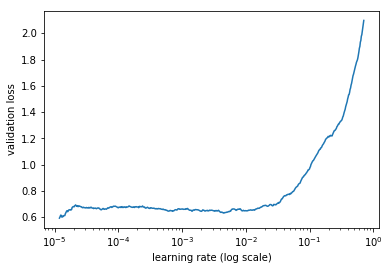

In [20]:
learn.lr_find()
learn.sched.plot()

In [21]:
learn.unfreeze()
learn.fit(0.001, 10)

epoch      trn_loss   val_loss   accuracy                    
    0      0.602603   0.561687   0.81      
    1      0.577932   0.54847    0.8133                      
    2      0.583376   0.537065   0.8178                      
    3      0.550821   0.527588   0.8217                      
    4      0.572696   0.523802   0.8213                      
    5      0.556596   0.525484   0.8237                      
    6      0.521291   0.516967   0.8246                      
    7      0.531459   0.511428   0.8267                      
    8      0.527906   0.507971   0.8265                      
    9      0.511773   0.508322   0.8268                      


[0.5083223731040954, 0.8268]

### Results - accuracy

In [28]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.8394